<a href="https://colab.research.google.com/github/ktichola/Image-matching/blob/main/%CE%A4%CE%B5%CE%BB%CE%B5%CE%B9%CE%BF_image_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'image-matching-challenge-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71885%2F8143495%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T160504Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D26fc73973a20cf840968d6e706236abdad1811f1f9dfc44609b4e8903fb202705bfd2276a9bcac3eeda76273f609ee1a9a389b592a8b3317aacc6e4fd340d0c76076985a49744477f10c39a1de56740c623ff7ef7c008757fcb7172724f452ad28282fd65c58bc0db4292457430cd2e616789660cd7cfbc9c97eac5960406228281b607277c2ad82890d81978ff202783ed8f04a79ca918ded10592182fa553a47cf811bdc5e27ceda86e8213a810bbd2798bc9e5d4e459799f758ef486f898e32bf7f5d1e1f0df7e8da09a545098d636717d79452aeebb59dd3eaa27af3104f45c082fbaba4cf025beea9ec1699754dafbf4b9ca5632afa95ade82bda1ca186,imc2024-packages-lightglue-rerun-kornia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4628051%2F7884485%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T160504Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D80720df50a9769d5445b8340322b9c24a94d04588e892d7ce9257ca84dfef35bed09d5d3927bbb3dba8720933ee0cce02139b76d0cddc37ca8ad071a3f69cb47b4a3bcd4d36082d0a2e687a7007d2f1beb76a77c72fb57bdf2b0f5c2d18da39a2f28db3abbe4734154a4360ab66cb701db8387b02618adca56e1115ae328c3dcdaf0559ccf974972b1802fdc14d0ee3234506e67b7fde1bfdaa64dc22d56a4a0a54d0a6ef2d99a3d35b9ff433d1548cfa1566bf31ca3fddf127de8d21703dba6eb63598a3a30731503dfd35e3ad04284ab840ccbeefd7a42a411f68292c2f62551f212de049529154286d742975b769ac4c6d01a63f305712d04b0f1ca0c686b,colmap-db-import:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4628331%2F7884725%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T160504Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4d01bdc510ca95588efe67726f36b6143a98b14526589ff759ce705bf38bb432e280c8c1bd082caab6b99e61eb795d6d9518e7eaa7399e8683235ad67dffb4e30999a2e148443f87c35755fe210104ac6b4be7540b8c91a335e737b87a5bd9ba950431b730fd3b8891a0dacf2ea7d69449d118f7b1f72ccb3efadf06b5fec1657b237674ec93b102fefb3a3f0647867e0b68a7f0922262a43c5c987ce1385718ba07a97b6b3bc4906b1fbd96b0c12f3a92c3ff0c20c59005f4dd8a09547e9535440e756a3c043fa9d595428d23273db3a002624f094b959e07ea25a8e96aaad358eda4f277e04cbc9d4e2f31ab2deb74b42ad261838ba449a75722751fcd44e7,dinov2/pytorch/base/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F3326%2F4534%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T160504Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D663bde927573d222017044287dd8aef40e13493210e13801169c6f77e5b571ac19987a5ea07364cd0d078e6c3dbdb2f27b116e16473f4bd7c2cbfdf0cdd46ba727385c73c06fb25a18bad7a3f25b66cefbf108dc3b8df4b5ceef5a9e6a2af286b7b106512247253636ef6b0464fda682964c76a9830cbfbc6d61d2e64a1e56f4a86f3b97e36e10a8e2757c1a41b85cf3f02adec7132f74a9c77ee88d178bd11d4fd33259e9ea3ff1f280d5060442c8b316a94b041f7c1b6abb8cefd5825f76088c50a5aa169a8463df090d05fb1297eb641924a07a532a0b7c70d6e59bd11f9a10dcc8ece4c31079f9f19389f810e5b5486eadaddd24006bddfb4adc0ea8b12b,lightglue/pytorch/aliked/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F14317%2F17191%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T160504Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9f4f04889d174ed6c2221364b944b3976672bcd5bda51d4c1fb9b6f250d38304c5794fcea0815d925fda56f0d1f3bda6d056f2ed1f1a147e13c6e66f662b2f23037e447bab7dbf7a4c683a138facb678b99365f004043f36a954498fa922b7e47679f46e64145c03c8f7e64c5adeda971b52a4e2daf583ceb4efcd5e42129729caded6d6a1a4d992183561c4d23e69f77957e3928d0fc6e69f081d34d53eca6a637e1ae0f829ca665ed80d0a4a3bdb6c3a342c87cc8e3b7cfdf830526be98aa6947306909c27c2ba8516d72b99002a7b34ee44228243006e7c28364aa468c2628048ce3f61a9a775f7b2f2ce56b275113bdb8d1e8641576a8b0e855802662817,aliked/pytorch/aliked-n16/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F14611%2F17555%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T160505Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1b0ed09ebfe7674f0fcb1c28788cbfdf181d16dd3ae7e2e0a773ad6bf18417ff229f570768182cf90f68509d9802a1ceee87ce3cc6390d1526b6e856fb61a0d75da825352a358f277f6c7d0f498e845954364f3cecb101cacaca67171a43107fc93b40fc485a379a717895feabf93beea871ae422d599043def3ed285d6d3d170cae3441b3cc0bbc6938250e5deb08b2209b8bb9ea832fe4deb092e61b46cb35ff05ff818575bdc21c25ff72f64db167b277fef8e4a9f089a22dbba0b448077dac1e5663142f4cbe4ce9797499109f2d216bfa2561b54cbc3310647c2f6403c73badfa474726019007900b147d715dc68bf31bad61aa5e1137897ef3ce20590e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Exploratory Data Analysis
**üèõÔ∏è Phototourism and historical preservation:** different viewpoints, sensor types, time of day/year, and occlusions. Ancient historical sites add a unique set of challenges

**‚òÄÔ∏è Night vs day and temporal changes:** combination of day and night photographs, including poor lighting, or photographs taken months or years apart, in different weather

**‚úàÔ∏è Aerial and mixed aerial-ground:** images from drones, featuring arbitrary in-plane rotations, matched against similar images and also images taken from the ground

**‚ôªÔ∏è Repeated structures:** symmetrical objects require details to disambiguate perspective

**üå≤ Natural environments:** highly non-regular structures such as trees and foliage

**ü™û Transparencies and reflections:** objects like glassware are lacking in texture and create reflections and specularities which pose a different set of problems

# Installing & importing relevant packages and models

In [ ]:
!pip install --no-index /kaggle/input/imc2024-packages-lightglue-rerun-kornia/* --no-deps
!mkdir -p /root/.cache/torch/hub/checkpoints
!cp /kaggle/input/aliked/pytorch/aliked-n16/1/* /root/.cache/torch/hub/checkpoints/
!cp /kaggle/input/lightglue/pytorch/aliked/1/* /root/.cache/torch/hub/checkpoints/
!cp /kaggle/input/lightglue/pytorch/aliked/1/aliked_lightglue.pth /root/.cache/torch/hub/checkpoints/aliked_lightglue_v0-1_arxiv-pth

Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/kornia-0.7.2-py2.py3-none-any.whl
Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/kornia_moons-0.2.9-py3-none-any.whl
Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/kornia_rs-0.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/lightglue-0.0-py3-none-any.whl
Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/pycolmap-0.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/rerun_sdk-0.15.0a2-cp38-abi3-manylinux_2_31_x86_64.whl
kornia is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
kornia-moons is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
kornia-rs is already installed 

In [ ]:
# General utilities
import matplotlib.pyplot as plt

import os
from tqdm import tqdm
from pathlib import Path
from time import time, sleep
from fastprogress import progress_bar
import gc
import numpy as np
import h5py
from IPython.display import clear_output
from collections import defaultdict
from copy import deepcopy
from typing import Any
import itertools
import pandas as pd

# CV/MLe
import cv2
import torch
from torch import Tensor as T
import torch.nn.functional as F
import kornia as K
import kornia.feature as KF
from PIL import Image
from transformers import AutoImageProcessor, AutoModel

import torch
from lightglue import match_pair
from lightglue import LightGlue, ALIKED
from lightglue.utils import load_image, rbd

# 3D reconstruction
import pycolmap

# Data importing into colmap
import sys
sys.path.append("/kaggle/input/colmap-db-import")

# Provided by organizers
from database import *
from h5_to_db import *

def arr_to_str(a):
    """Returns ;-separated string representing the input"""
    return ";".join([str(x) for x in a.reshape(-1)])

def load_torch_image(file_name: Path | str, device=torch.device("cpu")):
    """Loads an image and adds batch dimension"""
    img = K.io.load_image(file_name, K.io.ImageLoadType.RGB32, device=device)[None, ...]
    return img

device = K.utils.get_cuda_device_if_available(0)
print(device)

DEBUG = len([p for p in Path("/kaggle/input/image-matching-challenge-2024/test/").iterdir() if p.is_dir()]) == 2
print("DEBUG:", DEBUG)

2024-04-30 05:54:17.508084: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 05:54:17.508182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 05:54:17.632646: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


cuda:0
DEBUG: False


<a id="1"></a>
# Finding image pairs

To find pairs of similar images, we use [DINOv2](https://arxiv.org/pdf/2304.07193.pdf) to obtain normalized image embeddings.

<center><img src="https://www.labellerr.com/blog/content/images/2023/05/Dino-v2-20230419.jpg" alt="DINOv2 example"></center>
Then, we calculate the distances between all the embeddings, and only keep those below a given distance threshold. For images with less than a set minimum number of pairs, the closest ones are kept instead.

In [ ]:
def embed_images(
    paths: list[Path],
    model_name: str,
    device: torch.device = torch.device("cpu"),
) -> T:
    """Computes image embeddings.

    Returns a tensor of shape [len(filenames), output_dim]
    """
    processor = AutoImageProcessor.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name).eval().to(device)

    embeddings = []

    for i, path in tqdm(enumerate(paths), desc="Global descriptors"):
        image = load_torch_image(path)

        with torch.inference_mode():
            inputs = processor(images=image, return_tensors="pt", do_rescale=False).to(device)
            outputs = model(**inputs) # last_hidden_state and pooled

            # Max pooling over all the hidden states but the first (starting token)
            # To obtain a tensor of shape [1, output_dim]
            # We normalize so that distances are computed in a better fashion later
            embedding = F.normalize(outputs.last_hidden_state[:,1:].max(dim=1)[0], dim=-1, p=2)

        embeddings.append(embedding.detach().cpu())
    return torch.cat(embeddings, dim=0)

In [ ]:
def get_pairs_exhaustive(lst: list[Any]) -> list[tuple[int, int]]:
    """Obtains all possible index pairs of a list"""
    return list(itertools.combinations(range(len(lst)), 2))

def get_image_pairs(
    paths: list[Path],
    model_name: str,
    similarity_threshold: float = 0.6,
    tolerance: int = 1000,
    min_matches: int = 20,
    exhaustive_if_less: int = 20,
    p: float = 2.0,
    device: torch.device = torch.device("cpu"),
) -> list[tuple[int, int]]:
    """Obtains pairs of similar images"""
    if len(paths) <= exhaustive_if_less:
        return get_pairs_exhaustive(paths)

    matches = []

    # Embed images and compute distances for filtering
    embeddings = embed_images(paths, model_name)
    distances = torch.cdist(embeddings, embeddings, p=p)

    # Remove pairs above similarity threshold (if enough)
    mask = distances <= similarity_threshold
    image_indices = np.arange(len(paths))

    for current_image_index in range(len(paths)):
        mask_row = mask[current_image_index]
        indices_to_match = image_indices[mask_row]

        # We don't have enough matches below the threshold, we pick most similar ones
        if len(indices_to_match) < min_matches:
            indices_to_match = np.argsort(distances[current_image_index])[:min_matches]

        for other_image_index in indices_to_match:
            # Skip an image matching itself
            if other_image_index == current_image_index:
                continue

            # We need to check if we are below a certain distance tolerance
            # since for images that don't have enough matches, we picked
            # the most similar ones (which could all still be very different
            # to the image we are analyzing)
            if distances[current_image_index, other_image_index] < tolerance:
                # Add the pair in a sorted manner to avoid redundancy
                matches.append(tuple(sorted((current_image_index, other_image_index.item()))))

    return sorted(list(set(matches)))

In [ ]:
if DEBUG:
    images_list = list(Path("/kaggle/input/image-matching-challenge-2024/test/church/images/").glob("*.png"))[:10]
    index_pairs = get_image_pairs(images_list, "/kaggle/input/dinov2/pytorch/base/1")
    print(index_pairs)

<a id="2"></a>
# Computing keypoints

In order to be able to know the position of each camera, we must be able to relate images to each other. For this, we extract relevant keypoints and compare pairs of image keypoints against each other. There are many ways to extract relevant keypoints, the most traditional one being [SIFT](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). However, newer and improved methods exist now, one of which is [ALIKED](https://arxiv.org/abs/2304.03608), the keypoint extraction method used in the solution.

<center><img src="https://www.catalyzex.com/_next/image?url=https%3A%2F%2Fd3i71xaburhd42.cloudfront.net%2Faf9fc17471b4c38211c3d9f5058c9c1f59501eea%2F3-Figure1-1.png&w=640&q=75" alt="ALIKED architecture"></center>


Let's take a closer look at the keypoints that ALIKED extracts.

In [ ]:
if DEBUG:
    dtype = torch.float32 # ALIKED has issues with float16

    extractor = ALIKED(
            max_num_keypoints=4096,
            detection_threshold=0.01,
            resize=1024
        ).eval().to(device, dtype)

    path = images_list[0]
    image = load_torch_image(path, device=device).to(dtype)
    features = extractor.extract(image)

    fig, ax = plt.subplots(1, 2, figsize=(10, 20))
    ax[0].imshow(image[0, ...].permute(1,2,0).cpu())
    ax[1].imshow(image[0, ...].permute(1,2,0).cpu())
    ax[1].scatter(features["keypoints"][0, :, 0].cpu(), features["keypoints"][0, :, 1].cpu(), s=0.5, c="red")

    del extractor

In [ ]:
def detect_keypoints(
    paths: list[Path],
    feature_dir: Path,
    num_features: int = 4096,
    resize_to: int = 1024,
    device: torch.device = torch.device("cpu"),
) -> None:
    """Detects the keypoints in a list of images with ALIKED

    Stores them in feature_dir/keypoints.h5 and feature_dir/descriptors.h5
    to be used later with LightGlue
    """
    dtype = torch.float32 # ALIKED has issues with float16

    extractor = ALIKED(
        max_num_keypoints=num_features,
        detection_threshold=0.01,
        resize=resize_to
    ).eval().to(device, dtype)

    feature_dir.mkdir(parents=True, exist_ok=True)

    with h5py.File(feature_dir / "keypoints.h5", mode="w") as f_keypoints, \
         h5py.File(feature_dir / "descriptors.h5", mode="w") as f_descriptors:

        for path in tqdm(paths, desc="Computing keypoints"):
            key = path.name

            with torch.inference_mode():
                image = load_torch_image(path, device=device).to(dtype)
                features = extractor.extract(image)

                f_keypoints[key] = features["keypoints"].squeeze().detach().cpu().numpy()
                f_descriptors[key] = features["descriptors"].squeeze().detach().cpu().numpy()

In [ ]:
if DEBUG:
    feature_dir = Path("./sample_test_features")
    detect_keypoints(images_list, feature_dir)

<a id="3"></a>
# Match and compute keypoint distances

Now that we have the relevant image pairs and keypoints, we can go ahead and compare the keypoints of the images in a pair to find a good relationship between them. This is done with [LightGlue](https://arxiv.org/abs/2306.13643), which matches the keypoints and their descriptors between two images.

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fraw.githubusercontent.com%2Fcvg%2Flightglue%2Fmaster%2Fassets%2Feasy_hard.jpg&f=1&nofb=1&ipt=60962b56b05d3e8f95a064ab2a6010e5a6cbd5f1d10379d90e660b2561a3bae9&ipo=images" alt="LightGlue example"></center>

In [ ]:
if DEBUG:
    matcher_params = {
        "width_confidence": -1,
        "depth_confidence": -1,
        "mp": True if 'cuda' in str(device) else False,
    }
    matcher = KF.LightGlueMatcher("aliked", matcher_params).eval().to(device)

    with h5py.File(feature_dir / "keypoints.h5", mode="r") as f_keypoints, \
         h5py.File(feature_dir / "descriptors.h5", mode="r") as f_descriptors:
            idx1, idx2 = index_pairs[0]
            key1, key2 = images_list[idx1].name, images_list[idx2].name

            keypoints1 = torch.from_numpy(f_keypoints[key1][...]).to(device)
            keypoints2 = torch.from_numpy(f_keypoints[key2][...]).to(device)
            print("Keypoints:", keypoints1.shape, keypoints2.shape)
            descriptors1 = torch.from_numpy(f_descriptors[key1][...]).to(device)
            descriptors2 = torch.from_numpy(f_descriptors[key2][...]).to(device)
            print("Descriptors:", descriptors1.shape, descriptors2.shape)

            with torch.inference_mode():
                distances, indices = matcher(
                    descriptors1,
                    descriptors2,
                    KF.laf_from_center_scale_ori(keypoints1[None]),
                    KF.laf_from_center_scale_ori(keypoints2[None]),
                )
    print(distances, indices)

In [ ]:
def keypoint_distances(
    paths: list[Path],
    index_pairs: list[tuple[int, int]],
    feature_dir: Path,
    min_matches: int = 15,
    verbose: bool = True,
    device: torch.device = torch.device("cpu"),
) -> None:
    """Computes distances between keypoints of images.

    Stores output at feature_dir/matches.h5
    """

    matcher_params = {
        "width_confidence": -1,
        "depth_confidence": -1,
        "mp": True if 'cuda' in str(device) else False,
    }
    matcher = KF.LightGlueMatcher("aliked", matcher_params).eval().to(device)

    with h5py.File(feature_dir / "keypoints.h5", mode="r") as f_keypoints, \
         h5py.File(feature_dir / "descriptors.h5", mode="r") as f_descriptors, \
         h5py.File(feature_dir / "matches.h5", mode="w") as f_matches:

            for idx1, idx2 in tqdm(index_pairs, desc="Computing keypoing distances"):
                key1, key2 = paths[idx1].name, paths[idx2].name

                keypoints1 = torch.from_numpy(f_keypoints[key1][...]).to(device)
                keypoints2 = torch.from_numpy(f_keypoints[key2][...]).to(device)
                descriptors1 = torch.from_numpy(f_descriptors[key1][...]).to(device)
                descriptors2 = torch.from_numpy(f_descriptors[key2][...]).to(device)

                with torch.inference_mode():
                    distances, indices = matcher(
                        descriptors1,
                        descriptors2,
                        KF.laf_from_center_scale_ori(keypoints1[None]),
                        KF.laf_from_center_scale_ori(keypoints2[None]),
                    )

                # We have matches to consider
                n_matches = len(indices)
                if n_matches:
                    if verbose:
                        print(f"{key1}-{key2}: {n_matches} matches")
                    # Store the matches in the group of one image
                    if n_matches >= min_matches:
                        group  = f_matches.require_group(key1)
                        group.create_dataset(key2, data=indices.detach().cpu().numpy().reshape(-1, 2))

In [ ]:
if DEBUG:
    keypoint_distances(images_list, index_pairs, feature_dir, verbose=False)

<a id="4"></a>
# RANSAC
Up to now, we have matched keypoints and their descriptors extracted from pairs of images. This is described by a [fundamental matrix](https://en.wikipedia.org/wiki/Fundamental_matrix_(computer_vision)) denoted as $F$. In epipolar geometry, with homogeneous image coordinates, $x$ and $x‚Ä≤$, of corresponding points in a stereo image pair, $Fx$ describes a line (an epipolar line) on which the corresponding point $x‚Ä≤$ on the other image must lie. That means, for all pairs of corresponding points, $x'Fx = 0$ holds. This is known as epipolar constraint or correspondance condition (or Longuet-Higgins equation), and is solved via the [eight-point algorithm](https://en.wikipedia.org/wiki/Eight-point_algorithm).

<center><img src="https://cmsc426.github.io/assets/sfm/epipole1.png" alt="Fundamental matrix"></center>

Since the keypoint correspondences are computed using feature descriptors, the data is bound to be noisy and (in general) contains several outliers. Thus, to remove these outliers, we use a [RANSAC](https://en.wikipedia.org/wiki/Random_sample_consensus) algorithm to find the best possible fundamental matrix. So, out of all possibilities, the $F$ matrix with maximum number of inliers is chosen.

<center><img src="https://cmsc426.github.io/assets/sfm/ransac.png" alt="RANSAC"></center>

In [ ]:
def import_into_colmap(
    path: Path,
    feature_dir: Path,
    database_path: str = "colmap.db",
) -> None:
    """Adds keypoints into colmap"""
    db = COLMAPDatabase.connect(database_path)
    db.create_tables()
    single_camera = False
    fname_to_id = add_keypoints(db, feature_dir, path, "", "simple-pinhole", single_camera)
    add_matches(
        db,
        feature_dir,
        fname_to_id,
    )
    db.commit()

In [ ]:
if DEBUG:
    database_path = "colmap.db"
    images_dir = images_list[0].parent
    import_into_colmap(
        images_dir,
        feature_dir,
        database_path,
    )

    # This does RANSAC
    pycolmap.match_exhaustive(database_path)

<a id="5"></a>
# Sparse Reconstruction

Now we have similar image pairs, with matched keypoint descriptors, without outliers! All that is left is to construct the scene and obtain the camera positions. We do this with pycolmap, which offers an incremental reconstruction algorithm that starts from two pairs of images and continually adds more and more images to the scene, resulting in a reconstructed scene with camera information. We can then use the camera rotation and translation as our submission!

In [ ]:
if DEBUG:
    mapper_options = pycolmap.IncrementalPipelineOptions()
    mapper_options.min_model_size = 3
    mapper_options.max_num_models = 2

    maps = pycolmap.incremental_mapping(
        database_path=database_path,
        image_path=images_dir,
        output_path=Path.cwd() / "incremental_pipeline_outputs",
        options=mapper_options,
    )

In [ ]:
if DEBUG:
    print(maps[0].summary())
    for k, im in maps[0].images.items():
        print("Rotation", im.cam_from_world.rotation.matrix(), "Translation:", im.cam_from_world.translation, sep="\n")
        print()

# Running everything

In [ ]:
def parse_sample_submission(
    base_path: Path,
) -> dict[dict[str, list[Path]]]:
    """Construct a dict describing the test data as

    {"dataset": {"scene": [<image paths>]}}
    """
    data_dict = {}
    with open(base_path / "sample_submission.csv", "r") as f:
        for i, l in enumerate(f):
            # Skip header
            if i == 0:
                print("header:", l)

            if l and i > 0:
                image_path, dataset, scene, _, _ = l.strip().split(',')
                if dataset not in data_dict:
                    data_dict[dataset] = {}
                if scene not in data_dict[dataset]:
                    data_dict[dataset][scene] = []
                data_dict[dataset][scene].append(Path(base_path / image_path))

    for dataset in data_dict:
        for scene in data_dict[dataset]:
            print(f"{dataset} / {scene} -> {len(data_dict[dataset][scene])} images")

    return data_dict

In [ ]:
def create_submission(
    results: dict,
    data_dict: dict[dict[str, list[Path]]],
    base_path: Path,
) -> None:
    """Prepares a submission file."""

    with open("submission.csv", "w") as f:
        f.write("image_path,dataset,scene,rotation_matrix,translation_vector\n")

        for dataset in data_dict:
            # Only write results for datasets with images that have results
            if dataset in results:
                res = results[dataset]
            else:
                res = {}

            # Same for scenes
            for scene in data_dict[dataset]:
                if scene in res:
                    scene_res = res[scene]
                else:
                    scene_res = {"R":{}, "t":{}}

                # Write the row with rotation and translation matrices
                for image in data_dict[dataset][scene]:
                    if image in scene_res:
                        print(image)
                        R = scene_res[image]["R"].reshape(-1)
                        T = scene_res[image]["t"].reshape(-1)
                    else:
                        R = np.eye(3).reshape(-1)
                        T = np.zeros((3))
                    image_path = str(image.relative_to(base_path))
                    f.write(f"{image_path},{dataset},{scene},{arr_to_str(R)},{arr_to_str(T)}\n")

In [ ]:
class Config:
    base_path: Path = Path("/kaggle/input/image-matching-challenge-2024")
    feature_dir: Path = Path.cwd() / ".feature_outputs"

    device: torch.device = K.utils.get_cuda_device_if_available(0)

    pair_matching_args = {
        "model_name": "/kaggle/input/dinov2/pytorch/base/1",
        "similarity_threshold": 0.3,
        "tolerance": 500,
        "min_matches": 50,
        "exhaustive_if_less": 50,
        "p": 2.0,
    }

    keypoint_detection_args = {
        "num_features": 4096,
        "resize_to": 1024,
    }

    keypoint_distances_args = {
        "min_matches": 15,
        "verbose": False,
    }

    colmap_mapper_options = {
        "min_model_size": 3, # By default colmap does not generate a reconstruction if less than 10 images are registered. Lower it to 3.
        "max_num_models": 2,
    }

In [ ]:
def run_from_config(config: Config) -> None:
    results = {}

    data_dict = parse_sample_submission(config.base_path)
    datasets = list(data_dict.keys())

    for dataset in datasets:
        if dataset not in results:
            results[dataset] = {}

        for scene in data_dict[dataset]:
            images_dir = data_dict[dataset][scene][0].parent
            results[dataset][scene] = {}
            image_paths = data_dict[dataset][scene]
            print (f"Got {len(image_paths)} images")

            try:
                feature_dir = config.feature_dir / f"{dataset}_{scene}"
                feature_dir.mkdir(parents=True, exist_ok=True)
                database_path = feature_dir / "colmap.db"
                if database_path.exists():
                    database_path.unlink()

                # 1. Get the pairs of images that are somewhat similar
                index_pairs = get_image_pairs(
                    image_paths,
                    **config.pair_matching_args,
                    device=config.device,
                )
                gc.collect()

                # 2. Detect keypoints of all images
                detect_keypoints(
                    image_paths,
                    feature_dir,
                    **config.keypoint_detection_args,
                    device=device,
                )
                gc.collect()

                # 3. Match  keypoints of pairs of similar images
                keypoint_distances(
                    image_paths,
                    index_pairs,
                    feature_dir,
                    **config.keypoint_distances_args,
                    device=device,
                )
                gc.collect()

                sleep(1)

                # 4.1. Import keypoint distances of matches into colmap for RANSAC
                import_into_colmap(
                    images_dir,
                    feature_dir,
                    database_path,
                )

                output_path = feature_dir / "colmap_rec_aliked"
                output_path.mkdir(parents=True, exist_ok=True)

                # 4.2. Compute RANSAC (detect match outliers)
                # By doing it exhaustively we guarantee we will find the best possible configuration
                pycolmap.match_exhaustive(database_path)

                mapper_options = pycolmap.IncrementalPipelineOptions(**config.colmap_mapper_options)

                # 5.1 Incrementally start reconstructing the scene (sparse reconstruction)
                # The process starts from a random pair of images and is incrementally extended by
                # registering new images and triangulating new points.
                maps = pycolmap.incremental_mapping(
                    database_path=database_path,
                    image_path=images_dir,
                    output_path=output_path,
                    options=mapper_options,
                )

                print(maps)
                clear_output(wait=False)

                # 5.2. Look for the best reconstruction: The incremental mapping offered by
                # pycolmap attempts to reconstruct multiple models, we must pick the best one
                images_registered  = 0
                best_idx = None

                print ("Looking for the best reconstruction")

                if isinstance(maps, dict):
                    for idx1, rec in maps.items():
                        print(idx1, rec.summary())
                        try:
                            if len(rec.images) > images_registered:
                                images_registered = len(rec.images)
                                best_idx = idx1
                        except Exception:
                            continue

                # Parse the reconstruction object to get the rotation matrix and translation vector
                # obtained for each image in the reconstruction
                if best_idx is not None:
                    for k, im in maps[best_idx].images.items():
                        key = config.base_path / "test" / scene / "images" / im.name
                        results[dataset][scene][key] = {}
                        results[dataset][scene][key]["R"] = deepcopy(im.cam_from_world.rotation.matrix())
                        results[dataset][scene][key]["t"] = deepcopy(np.array(im.cam_from_world.translation))

                print(f"Registered: {dataset} / {scene} -> {len(results[dataset][scene])} images")
                print(f"Total: {dataset} / {scene} -> {len(data_dict[dataset][scene])} images")
                create_submission(results, data_dict, config.base_path)
                gc.collect()

            except Exception as e:
                print(e)

In [ ]:
run_from_config(Config)

Looking for the best reconstruction
0 Reconstruction:
	num_reg_images = 38
	num_cameras = 38
	num_points3D = 13123
	num_observations = 66955
	mean_track_length = 5.10211
	mean_observations_per_image = 1761.97
	mean_reprojection_error = 0.811656
Registered: church / church -> 38 images
Total: church / church -> 41 images
/kaggle/input/image-matching-challenge-2024/test/church/images/00046.png
/kaggle/input/image-matching-challenge-2024/test/church/images/00090.png
/kaggle/input/image-matching-challenge-2024/test/church/images/00092.png
/kaggle/input/image-matching-challenge-2024/test/church/images/00087.png
/kaggle/input/image-matching-challenge-2024/test/church/images/00050.png
/kaggle/input/image-matching-challenge-2024/test/church/images/00068.png
/kaggle/input/image-matching-challenge-2024/test/church/images/00083.png
/kaggle/input/image-matching-challenge-2024/test/church/images/00096.png
/kaggle/input/image-matching-challenge-2024/test/church/images/00069.png
/kaggle/input/image-m

In [ ]:
!cat submission.csv

image_path,dataset,scene,rotation_matrix,translation_vector
test/church/images/00046.png,church,church,-0.2240166658799836;-0.30574613761609354;-0.9253841541440272;0.36292901745221945;0.8550507199668052;-0.3703657578332733;0.9044882872095042;-0.4188168640552683;-0.08058146613042338,5.451974380497159;4.628272132318311;10.365456196145432
test/church/images/00090.png,church,church,0.9978026638087112;-0.0032159859150114097;-0.06617780240257676;-0.006568043419385142;0.9891002923836;-0.1470968130596924;0.06592954498463582;0.14720825058831272;0.9869057837792052,0.11992951492605576;0.013668813792352722;-0.8218567543027211
test/church/images/00092.png,church,church,0.9358565730607569;-0.11397987794280504;-0.3334382432822;0.14682116188496505;0.9863213652990168;0.07492470071633468;0.3203373551144562;-0.11907456394556605;0.9397899909764139,0.2954976964062981;-0.12374947979429617;-0.7785434091707766
test/church/images/00087.png,church,church,0.8767904394652332;-0.14897739029457913;-0.45721358514744

What to do next?¬∂
Here are some ways in which you can explore potential improvements:

Using a different image embedding model to obtain the image pairs
Trying other approaches for keypoint extraction, such as SIFT or DISK
Leveraging the training data to train a better models for each dataset
‚ù§Ô∏è Thank you for taking the time to read through my notebook. I hope you found it interesting and informative. If you have any feedback or suggestions for improvement, please don't hesitate to let me know in the comments.

üöÄ If you liked this notebook, please consider upvoting it so that others can discover it too. Your support means a lot to me, and it helps to motivate me to create more notebooks like this one in future.

In [ ]:
!pip install --no-index /kaggle/input/imc2024-packages-lightglue-rerun-kornia/* --no-deps

Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/kornia-0.7.2-py2.py3-none-any.whl
Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/kornia_moons-0.2.9-py3-none-any.whl
Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/kornia_rs-0.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/lightglue-0.0-py3-none-any.whl
Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/pycolmap-0.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Processing /kaggle/input/imc2024-packages-lightglue-rerun-kornia/rerun_sdk-0.15.0a2-cp38-abi3-manylinux_2_31_x86_64.whl
kornia is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
kornia-moons is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
kornia-rs is already installed 

In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from pathlib import Path

import cv2
import plotly.express as px
import plotly.graph_objects as go
import pycolmap

import io
import re
import zipfile
from argparse import ArgumentParser
from pathlib import Path
from typing import Final

import numpy.typing as npt
import requests

import rerun as rr
rr.init("IMC lizard")

from tqdm import tqdm

ModuleNotFoundError: No module named 'rerun'

In [ ]:
# Define paths to your data
train_data_dir = '/kaggle/input/image-matching-challenge-2024/train'
test_data_dir = '/kaggle/input/image-matching-challenge-2024/test'
train_labels_file = '/kaggle/input/image-matching-challenge-2024/train/train_labels.csv'
sample_submission_file = '/kaggle/input/image-matching-challenge-2024/sample_submission.csv'

In [ ]:
train_labels = pd.read_csv(train_labels_file)
train_labels.head()

image_name                                    rotation_matrix  \
0     00.png  0.999017467386748;-0.01951432487219089;0.03979...   
1     01.png  0.999147719991382;-0.021624129414769648;0.0351...   
2     02.png  0.9992527616183833;-0.02402019259931326;0.0302...   
3     03.png  0.9993946226667176;-0.02356062921667625;0.0255...   
4     04.png  0.9995276708105233;-0.02256816267742356;0.0208...   

                                  translation_vector  \
0  -0.011700149127917355;0.018812528601332625;0.3...   
1  -0.011610785964818585;0.016710808069866724;0.3...   
2  -0.011589797430545654;0.014113680489915202;0.3...   
3  -0.011471598819000773;0.011325953000912126;0.3...   
4  -0.011389007765655301;0.008237801582322509;0.3...   

                                  calibration_matrix               dataset  \
0  5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
1  5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
2  5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
3  5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
4  5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   

                  scene  
0  transp_obj_glass_cup  
1  transp_obj_glass_cup  
2  transp_obj_glass_cup  
3  transp_obj_glass_cup  
4  transp_obj_glass_cup

In [ ]:
!ls /kaggle/input/image-matching-challenge-2024/train/pond/smf
pond_smf = '/kaggle/input/image-matching-challenge-2024/train/pond/smf'
pond_imgs = '/kaggle/input/image-matching-challenge-2024/train/pond/images'

ls: cannot access '/kaggle/input/image-matching-challenge-2024/train/pond/smf': No such file or directory


In [ ]:
train_labels.groupby("dataset")["scene"].nunique()

dataset
church                              1
dioscuri                            1
lizard                              1
multi-temporal-temple-baalshamin    1
pond                                1
transp_obj_glass_cup                1
transp_obj_glass_cylinder           1
Name: scene, dtype: int64

In [ ]:
df_counts = train_labels["dataset"].value_counts()
colors = ["gold", "mediumturquoise", "darkorange", "lightgreen", "red", "pink", "darkblue"]

fig = go.Figure(
    data=[
        go.Pie(
            labels=df_counts.index,
            values=df_counts.values,
            textfont_size=20,
            marker=dict(colors=colors, pattern=dict(shape=[".", "x", "+", "-", "|", "\\", "/"]))
        )
    ]
)
fig.update_layout(
    title="Pie distribution of dataset images",
    legend_title_text='Dataset names:'
)

fig.show()

In [ ]:
train_categories = pd.read_csv("/kaggle/input/image-matching-challenge-2024/train/categories.csv")
train_categories.head()

scene                             categories
0                            church                 symmetries-and-repeats
1                          dioscuri  historical_preservation;air-to-ground
2                            lizard                     day-night;temporal
3  multi-temporal-temple-baalshamin       historical_preservation;temporal
4                              pond              day-night;temporal;nature

Let's separate categories, so it will be one category per scene (they are separated with ";").

In [ ]:
train_categories["category"] = train_categories["categories"].str.split(";")
train_categories = train_categories.explode("category")
train_categories.head()

scene                             categories                 category
0    church                 symmetries-and-repeats   symmetries-and-repeats
1  dioscuri  historical_preservation;air-to-ground  historical_preservation
1  dioscuri  historical_preservation;air-to-ground            air-to-ground
2    lizard                     day-night;temporal                day-night
2    lizard                     day-night;temporal                 temporal

Let's see the distribution of categories in datasets.

In [ ]:
category_counts = train_categories["category"].value_counts()

fig = go.Figure(
    data=[
        go.Pie(
            labels=category_counts.index,
            values=df_counts.values,
            textfont_size=20,
            marker=dict(colors=colors, pattern=dict(shape=[".", "x", "+", "-", "|", "\\", "/"]))
        )
    ]
)
fig.update_layout(
    title="Distribution of categories in datasets",
    legend_title_text='Categories:'
)

fig.show()


Now let's visualize the relationship between datasets(i.e. scenes) and categories

In [ ]:
fig = px.sunburst(train_categories, path=['scene', 'category'] )
fig.update_layout(
    title="Scene and category relation",
)

fig.show()

In [ ]:
# packages

# standard
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# import rotation package
from scipy.spatial.transform import Rotation as R

In [ ]:
# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook
pd.set_option('display.max_colwidth', None) # columns can be as wide as necessary to show full content

# aesthetics
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

In [ ]:
# load training data table
df_train = pd.read_csv('../input/image-matching-challenge-2024/train/train_labels.csv')
df_train.head()

image_name  \
0     00.png   
1     01.png   
2     02.png   
3     03.png   
4     04.png   

                                                                                                                                                                            rotation_matrix  \
0      0.999017467386748;-0.01951432487219089;0.03979058910031915;0.03580410529229767;-0.17374693099514127;-0.9841392533650855;0.026118305848310826;0.9845969708944632;-0.17287752602655398   
1  0.999147719991382;-0.021624129414769648;0.035160072000451896;0.03507100839198339;-0.004484366109474225;-0.9993747619541763;0.021768279821637208;0.9997561140036355;-0.003722164149712992   
2       0.9992527616183833;-0.02402019259931326;0.030281161561702366;0.03401506827119704;0.17446571991611926;-0.9840755497951647;0.018354659586596225;0.9843702265517997;0.1751524009250745   
3         0.9993946226667176;-0.02356062921667625;0.025598533859643915;0.03207163399533079;0.3387496556434208;-0.9403297725236256;0.013483266581899838;0.9405815050022929;0.339300212157174   
4      0.9995276708105233;-0.02256816267742356;0.020859370015773024;0.029327975512817118;0.49769391270506835;-0.8668567581259542;0.009181782855697686;0.8670590794690317;0.4981207158650458   

                                               translation_vector  \
0  -0.011700149127917355;0.018812528601332625;0.39292089450723033   
1   -0.011610785964818585;0.016710808069866724;0.3904348025368086   
2   -0.011589797430545654;0.014113680489915202;0.3883381399691822   
3  -0.011471598819000773;0.011325953000912126;0.38663455605386887   
4  -0.011389007765655301;0.008237801582322509;0.38546171231233306   

                                                                              calibration_matrix  \
0  5809.066058292364;0.0;2496.9582994472266;0.0;5809.066058292364;1722.4949763575241;0.0;0.0;1.0   
1  5809.066058292364;0.0;2496.9582994472266;0.0;5809.066058292364;1722.4949763575241;0.0;0.0;1.0   
2  5809.066058292364;0.0;2496.9582994472266;0.0;5809.066058292364;1722.4949763575241;0.0;0.0;1.0   
3  5809.066058292364;0.0;2496.9582994472266;0.0;5809.066058292364;1722.4949763575241;0.0;0.0;1.0   
4  5809.066058292364;0.0;2496.9582994472266;0.0;5809.066058292364;1722.4949763575241;0.0;0.0;1.0   

                dataset                 scene  
0  transp_obj_glass_cup  transp_obj_glass_cup  
1  transp_obj_glass_cup  transp_obj_glass_cup  
2  transp_obj_glass_cup  transp_obj_glass_cup  
3  transp_obj_glass_cup  transp_obj_glass_cup  
4  transp_obj_glass_cup  transp_obj_glass_cup

In [ ]:
# image names are NOT unique
df_train.image_name.value_counts()

image_name
00047.png    3
00069.png    3
00070.png    3
00071.png    3
00072.png    3
            ..
24.png       1
26.png       1
27.png       1
28.png       1
29.png       1
Name: count, Length: 1338, dtype: int64

In [ ]:
# example:
df_train[df_train.image_name=='00011.png']

image_name  \
510   00011.png   
1547  00011.png   
2070  00011.png   

                                                                                                                                                                       rotation_matrix  \
510   0.818333800438463;-0.2976050506491451;0.49169200205826163;0.10828787539620295;0.9200135666820614;0.37662816299784163;-0.5644497560475319;-0.25496327372598604;0.7851052171198519   
1547    -0.7663419257866364;-0.509538652867604;0.39126770121682314;0.362500200664674;0.15985444436032548;0.9181721849066891;-0.5303900991720161;0.8454684605898195;0.06220470117426924   
2070   -0.422747076932537;-0.338330246781646;-0.8407244215898969;0.33843022666396516;0.8016446836177851;-0.492778634792052;0.8406841800730959;-0.4928472839937458;-0.22439176463233945   

                                              translation_vector  \
510   -0.8737248891553905;-0.4725279502538612;1.5586160150928106   
1547    4.946315353455534;-16.135895107247393;18.500788691660265   
2070      27.773105439252546;21.02019717121849;67.09744874947172   

                                                         calibration_matrix  \
510     714.5348544605648;0.0;384.0;0.0;714.5348544605648;512.0;0.0;0.0;1.0   
1547    874.6108125755727;0.0;288.0;0.0;874.6108125755727;512.0;0.0;0.0;1.0   
2070  2209.8841784185324;0.0;384.0;0.0;2209.8841784185324;512.0;0.0;0.0;1.0   

     dataset   scene  
510   lizard  lizard  
1547    pond    pond  
2070  church  church

In [ ]:
# crosstab of dataset and scene
pd.crosstab(df_train.dataset, df_train.scene)

scene                             church  dioscuri  lizard  \
dataset                                                      
church                               110         0       0   
dioscuri                               0        70       0   
lizard                                 0         0     711   
multi-temporal-temple-baalshamin       0         0       0   
pond                                   0         0       0   
transp_obj_glass_cup                   0         0       0   
transp_obj_glass_cylinder              0         0       0   

scene                             multi-temporal-temple-baalshamin  pond  \
dataset                                                                    
church                                                           0     0   
dioscuri                                                         0     0   
lizard                                                           0     0   
multi-temporal-temple-baalshamin                                68     0   
pond                                                             0  1117   
transp_obj_glass_cup                                             0     0   
transp_obj_glass_cylinder                                        0     0   

scene                             transp_obj_glass_cup  \
dataset                                                  
church                                               0   
dioscuri                                             0   
lizard                                               0   
multi-temporal-temple-baalshamin                     0   
pond                                                 0   
transp_obj_glass_cup                                36   
transp_obj_glass_cylinder                            0   

scene                             transp_obj_glass_cylinder  
dataset                                                      
church                                                    0  
dioscuri                                                  0  
lizard                                                    0  
multi-temporal-temple-baalshamin                          0  
pond                                                      0  
transp_obj_glass_cup                                      0  
transp_obj_glass_cylinder                                36

In [ ]:
# convert input string to matrix
def get_rotation_matrix_from_string(i_matrix_string):
    # replace semicolon by comma
    my_string = i_matrix_string.replace(';',',')
    # split to list
    my_list = my_string.split(',')
    # convert each element from string to double
    my_list = [float(s) for s in my_list]
    # convert list to array
    my_array = np.array(my_list)
    # convert array to 3x3-matrix
    rot_matrix = np.asmatrix(my_array.reshape(3,3))
    return rot_matrix

In [ ]:
# convert input string to vector
def get_translation_from_string(i_vector_string):
    # replace semicolon by comma
    my_string = i_vector_string.replace(';',',')
    # split to list
    my_list = my_string.split(',')
    # convert each element from string to double
    my_list = [float(s) for s in my_list]
    # convert list to array
    my_array = np.array(my_list)
    return my_array

In [ ]:
# convert matrix (in string representation) to rotation vector
def get_rotation_vector(i_matrix_string):
    mat = get_rotation_matrix_from_string(i_matrix_string)
    rot = R.from_matrix(mat)
    vec = rot.as_rotvec()
    return vec

In [ ]:
# convert matrix (in string representation) to Euler angles
def get_rotation_angles(i_matrix_string):
    mat = get_rotation_matrix_from_string(i_matrix_string)
    rot = R.from_matrix(mat)
    vec = rot.as_euler('zyx', degrees=True)
    return vec

In [ ]:
# convert matrix (in string representation) to quaternion
def get_rotation_quaternion(i_matrix_string):
    mat = get_rotation_matrix_from_string(i_matrix_string)
    rot = R.from_matrix(mat)
    vec = rot.as_quat()
    return vec

In [ ]:
# example

# matrix
my_index = 7
my_example_mat = df_train.rotation_matrix[my_index]
print('Rotation matrix:')
print(get_rotation_matrix_from_string(my_example_mat))
print()
print('Converted to rotation vector:')
print(get_rotation_vector(my_example_mat))
print()
print('Converted to Euler angles:')
print(get_rotation_angles(my_example_mat))
print()
print('Converted to quaternion:')
print(get_rotation_quaternion(my_example_mat))

# translation vector
my_example_trans = df_train.translation_vector[my_index]
print()
print('Translation vector:')
print(get_translation_from_string(my_example_trans))

Rotation matrix:
[[ 9.99852825e-01 -1.47506145e-02  8.76062629e-03]
 [ 1.71538633e-02  8.67663593e-01 -4.96855747e-01]
 [-2.72348910e-04  4.96932901e-01  8.67788925e-01]]

Converted to rotation vector:
[0.52004561 0.00472692 0.01669549]

Converted to Euler angles:
[ 0.84521104  0.50195333 29.79345392]

Converted to quaternion:
[0.25709935 0.00233689 0.00825389 0.9663469 ]

Translation vector:
[-0.0112979  -0.00155502  0.38556162]


In [ ]:
# component projection functions
def get_rotation_vector_x(i_matrix_string):
    vec = get_rotation_vector(i_matrix_string)
    return vec[0]

def get_rotation_vector_y(i_matrix_string):
    vec = get_rotation_vector(i_matrix_string)
    return vec[1]

def get_rotation_vector_z(i_matrix_string):
    vec = get_rotation_vector(i_matrix_string)
    return vec[2]

def get_rotation_angle_1(i_matrix_string):
    vec = get_rotation_angles(i_matrix_string)
    return vec[0]

def get_rotation_angle_2(i_matrix_string):
    vec = get_rotation_angles(i_matrix_string)
    return vec[1]

def get_rotation_angle_3(i_matrix_string):
    vec = get_rotation_angles(i_matrix_string)
    return vec[2]

def get_translation_x(i_vector_string):
    vec = get_translation_from_string(i_vector_string)
    return vec[0]

def get_translation_y(i_vector_string):
    vec = get_translation_from_string(i_vector_string)
    return vec[1]

def get_translation_z(i_vector_string):
    vec = get_translation_from_string(i_vector_string)
    return vec[2]

In [ ]:
# add rotation vector components and norm to data frame
df_train['rot_x'] = df_train.rotation_matrix.apply(get_rotation_vector_x)
df_train['rot_y'] = df_train.rotation_matrix.apply(get_rotation_vector_y)
df_train['rot_z'] = df_train.rotation_matrix.apply(get_rotation_vector_z)
df_train['rot_norm'] = np.sqrt(df_train.rot_x**2 + df_train.rot_y**2 + df_train.rot_z**2)

# add Euler angles (in degrees)
df_train['angle_1'] = df_train.rotation_matrix.apply(get_rotation_angle_1)
df_train['angle_2'] = df_train.rotation_matrix.apply(get_rotation_angle_2)
df_train['angle_3'] = df_train.rotation_matrix.apply(get_rotation_angle_3)

# add translation vector components
df_train['trans_x'] = df_train.translation_vector.apply(get_translation_x)
df_train['trans_y'] = df_train.translation_vector.apply(get_translation_y)
df_train['trans_z'] = df_train.translation_vector.apply(get_translation_z)

In [ ]:
# statistics
features = ['rot_x','rot_y','rot_z','rot_norm',
            'angle_1', 'angle_2', 'angle_3',
            'trans_x', 'trans_y', 'trans_z']

df_train[features].describe()

rot_x        rot_y        rot_z     rot_norm      angle_1  \
count  2148.000000  2148.000000  2148.000000  2148.000000  2148.000000   
mean     -0.088564    -0.029407    -0.080420     1.190887    -2.651116   
std       0.475404     1.139374     0.727267     0.805859    78.104593   
min      -3.134208    -2.919248    -2.406536     0.001312  -179.956855   
25%      -0.282647    -0.779252    -0.576200     0.543463   -44.191700   
50%      -0.094922    -0.009170    -0.048458     0.991172    -2.361607   
75%       0.086431     0.565054     0.263071     1.718790    18.611150   
max       2.968890     2.996097     2.347388     3.139617   179.930057   

           angle_2      angle_3      trans_x      trans_y      trans_z  
count  2148.000000  2148.000000  2148.000000  2148.000000  2148.000000  
mean     -3.376682   -28.701298     0.051055    -1.046501     8.304462  
std      34.276964    54.151196     8.623394     5.731335    14.892743  
min     -81.651953  -179.633636   -51.743304   -16.135895   -14.845317  
25%     -32.939290   -56.422178    -3.011322    -3.066766     0.411153  
50%       0.143364   -22.984761    -0.368158    -1.213609     3.458859  
75%      22.838888    -0.633212     1.869332    -0.156335     9.434419  
max      83.240762   179.896223    46.017260    42.009276   156.754812

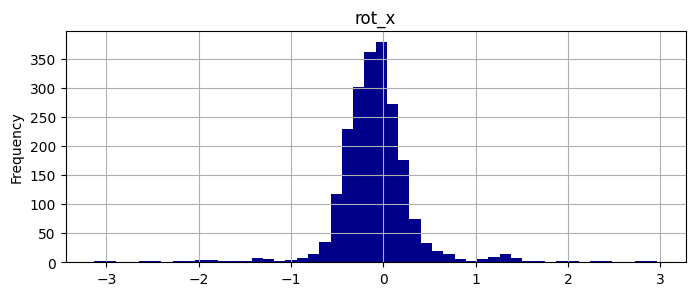

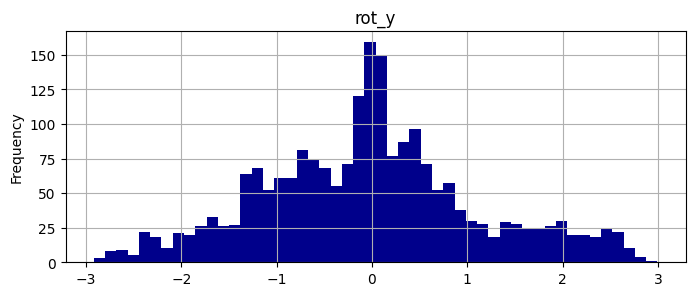

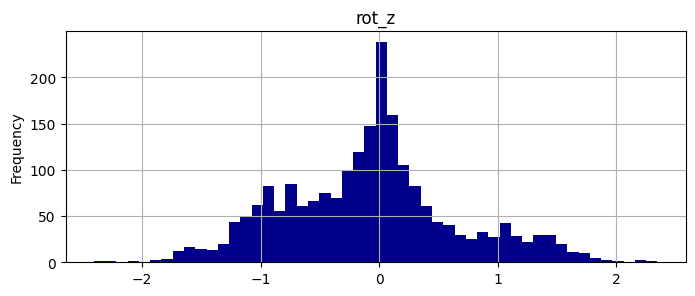

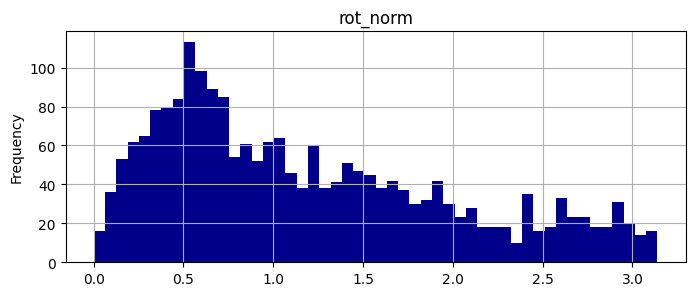

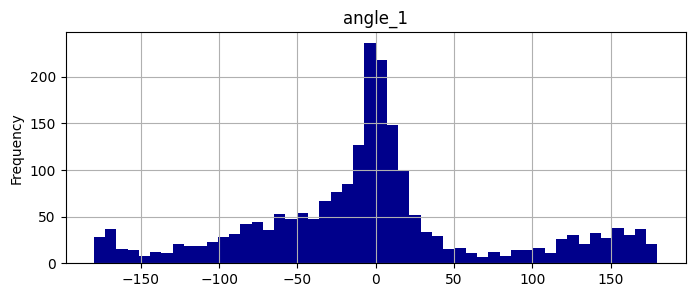

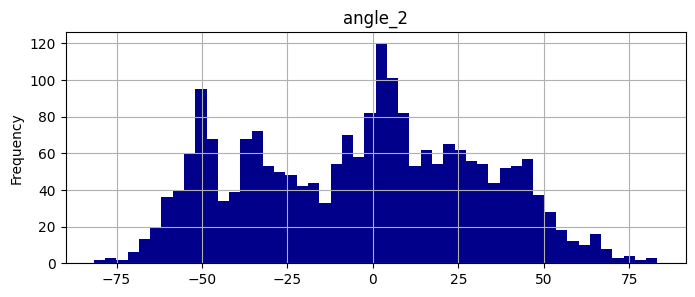

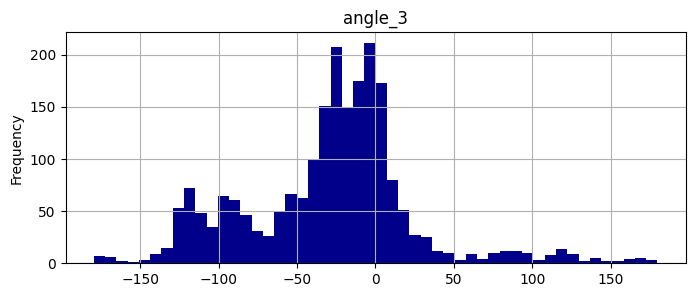

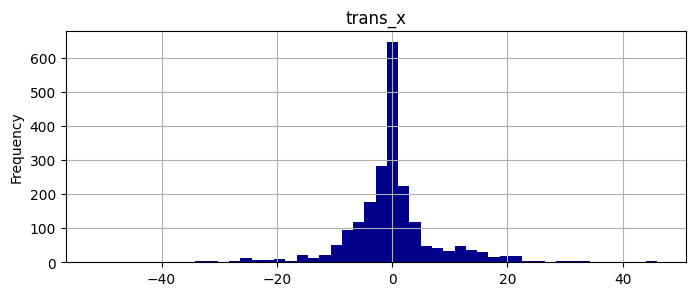

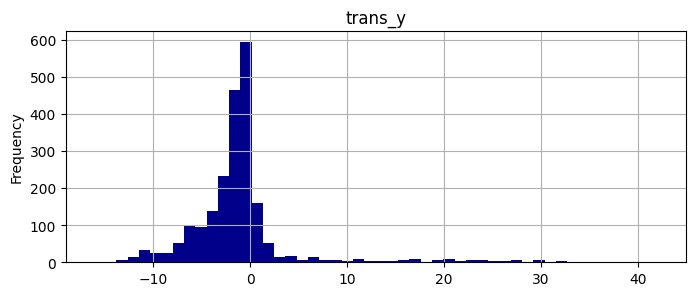

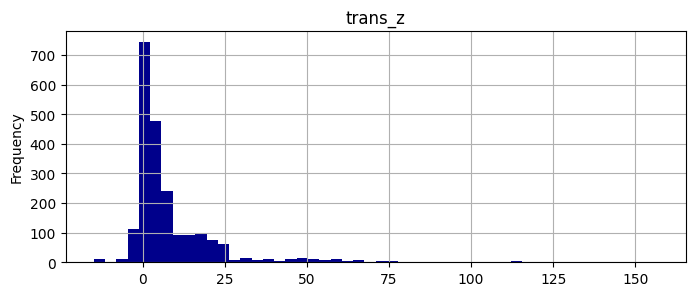

In [ ]:
# distributions
for f in features:
    plt.figure(figsize=(8,3))
    df_train[f].plot(kind='hist', bins=50, color=default_color_1)
    plt.title(f)
    plt.grid()
    plt.show()

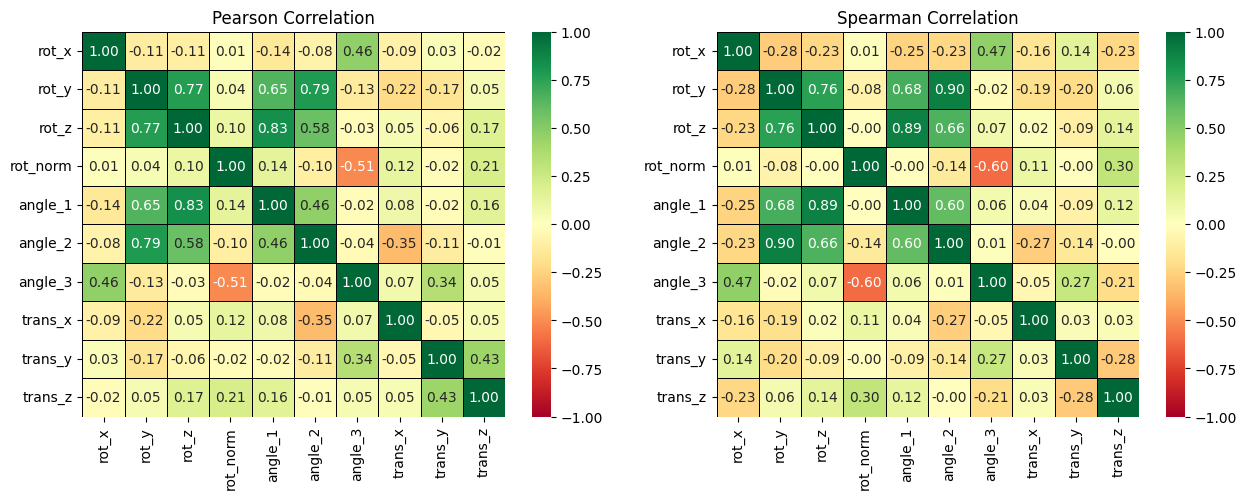

In [ ]:
corr_pearson = df_train[features].corr(method='pearson')
corr_spearman = df_train[features].corr(method='spearman')

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1,
            fmt='.2f', linecolor='black', linewidths=0.5)
plt.title('Pearson Correlation')

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1,
            fmt='.2f', linecolor='black', linewidths=0.5)
plt.title('Spearman Correlation')
plt.show()

In [ ]:
# mean of features by dataset
feature_means = df_train.groupby(by='dataset')[features].mean()
feature_means

rot_x     rot_y     rot_z  rot_norm  \
dataset                                                                    
church                           -0.032753 -0.539008  0.264328  1.175443   
dioscuri                         -0.052256  0.249614 -0.110214  1.846043   
lizard                            0.041079 -0.066393 -0.067656  0.957057   
multi-temporal-temple-baalshamin -0.034358 -0.360565  0.028130  0.725331   
pond                             -0.182589  0.045172 -0.132156  1.304270   
transp_obj_glass_cup             -0.085047  0.001143 -0.002027  1.571193   
transp_obj_glass_cylinder        -0.078647 -0.003433 -0.006191  1.563374   

                                    angle_1    angle_2    angle_3   trans_x  \
dataset                                                                       
church                            43.616345 -17.640146  44.509043 -1.140780   
dioscuri                         -43.205346   7.657929  15.924314 -0.861351   
lizard                            -7.643950  -1.256632 -21.349746 -0.340556   
multi-temporal-temple-baalshamin  10.165376 -17.279306   7.843459  2.843357   
pond                              -2.338655  -3.583536 -47.162530  0.309748   
transp_obj_glass_cup              -0.302213   1.702988  -4.869847 -0.011854   
transp_obj_glass_cylinder         -2.812792   4.477999  -4.414168 -0.036892   

                                    trans_y    trans_z  
dataset                                                 
church                            18.070278  42.221482  
dioscuri                           0.484035  25.254988  
lizard                            -0.759295   1.817840  
multi-temporal-temple-baalshamin   0.839243  27.827699  
pond                              -3.390194   7.350870  
transp_obj_glass_cup               0.003737   0.403710  
transp_obj_glass_cylinder          0.000162   0.431963

In [ ]:
# interactive 3d plot of rotation vectors
fig = px.scatter_3d(df_train,
                    x='rot_x', y='rot_y', z='rot_z',
                    color='dataset',
                    hover_data=['image_name'],
                    opacity=0.5)
fig.update_traces(marker_size = 4)
fig.update_layout(title='Rotation Vectors')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
# interactive 3d plot of Euler angles
fig = px.scatter_3d(df_train,
                    x='angle_1', y='angle_2', z='angle_3',
                    color='dataset',
                    hover_data=['image_name'],
                    opacity=0.5)
fig.update_traces(marker_size = 4)
fig.update_layout(title='Euler angles')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
# interactive 3d plot of translation vectors
fig = px.scatter_3d(df_train,
                    x='trans_x', y='trans_y', z='trans_z',
                    color='dataset',
                    hover_data=['image_name'],
                    opacity=0.5)
fig.update_traces(marker_size = 4)
fig.update_layout(title='Translation vectors')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

